In [1]:
import numpy as np
import pandas as pd

In [2]:
matches = pd.read_csv('matches.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [3]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [4]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [5]:
matches['winner'].fillna('Draw', inplace=True)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [7]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [8]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,5.541667,5.494253,5.373563,0.027299,5.323276,13.472701,3.349138
std,2143.239623,3.069266,3.311804,3.312930,3.261035,0.163070,3.269713,23.607994,3.411398
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,174.750000,2010.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,348.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,3.000000
75%,522.250000,2016.000000,9.000000,8.000000,7.000000,0.000000,8.000000,19.000000,6.000000
max,7953.000000,2018.000000,13.000000,13.000000,13.000000,1.000000,14.000000,146.000000,10.000000


In [9]:
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [10]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [11]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,696.000000,696.000000,696.000000,696.000000
mean,5.541667,5.494253,5.373563,5.323276
std,3.311804,3.312930,3.261035,3.269713
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.000000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [12]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 90
KKR -> 87
DD -> 80
CSK -> 77
RCB -> 77
KXIP -> 75
RR -> 69
DC -> 43
SRH -> 42
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 98
CSK -> 90
KKR -> 86
RCB -> 79
KXIP -> 76
RR -> 70
DD -> 67
SRH -> 52
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


In [13]:
df['winner'].hist(bins=40)

Text(0.5,1,'Match winners')

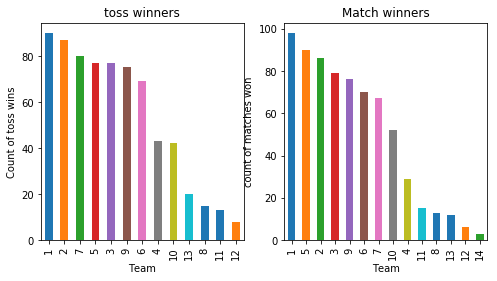

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [15]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
#find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [16]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [17]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
dtype: object

In [18]:
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,23,10
1,1,11,27,1,11,16,11
2,8,2,29,1,2,25,2
3,11,9,16,1,9,11,9
4,3,7,2,0,3,14,3


In [19]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=7)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

G:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
G:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 23.563%
Cross-Validation Score : 22.273%


In [21]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,23,10
1,1,11,27,1,11,16,11
2,8,2,29,1,2,25,2


In [22]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy : 87.931%


G:\anaconda\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
G:\anaconda\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
G:\anaconda\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
G:\anaconda\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
G:\anaconda\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Cross-Validation Score : 48.271%


In [23]:
df.head(7)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,23,10
1,1,11,27,1,11,16,11
2,8,2,29,1,2,25,2
3,11,9,16,1,9,11,9
4,3,7,2,0,3,14,3
5,8,10,15,1,10,23,10
6,2,1,24,1,1,34,1


In [24]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

KKR


In [25]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='DC'
team2='DD'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'14','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

DD


In [26]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='CSK'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'15',dicVal[toss_winner],'8','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

CSK


In [27]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='KKR'
team2='SRH'
toss_winner='KKR'
input=[dicVal[team1],dicVal[team2],'7',dicVal[toss_winner],'22','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

KKR


In [28]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='MI'
team2='DD'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'34',dicVal[toss_winner],'24','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

MI


In [29]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RR'
team2='KXIP'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'26',dicVal[toss_winner],'17','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

RR


In [30]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='DD'
team2='CSK'
toss_winner='DD'
input=[dicVal[team1],dicVal[team2],'8',dicVal[toss_winner],'10','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

CSK


In [31]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='KXIP'
team2='KKR'
toss_winner='KKR'
input=[dicVal[team1],dicVal[team2],'7',dicVal[toss_winner],'22','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

KKR


In [32]:
#'team1', 'team2', 'venue', 'toss_winner'(Bowl-1,Bat-0),'city','toss_decision'
team1='RCB'
team2='MI'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

MI


In [33]:
#'team1', 'team2', 'venue', 'toss_winner'(Bowl-1,Bat-0),'city','toss_decision'
team1='RR'
team2='SRH'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'15','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

SRH


In [34]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KXIP'
team2='MI'
toss_winner='KXIP'
input=[dicVal[team1],dicVal[team2],'22',dicVal[toss_winner],'7','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

MI


In [35]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KKR'
team2='DC'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'8',dicVal[toss_winner],'7','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

DC


In [36]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RCB'
team2='SRH'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'15','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

SRH


In [37]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='CSK'
team2='RR'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'15',dicVal[toss_winner],'15','8']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

CSK


In [38]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KXIP'
team2='DC'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'22',dicVal[toss_winner],'7','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

KXIP


In [39]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RCB'
team2='RR'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'26',dicVal[toss_winner],'17','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

RR


In [40]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='CSK'
team2='MI'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'34',dicVal[toss_winner],'24','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

MI


In [41]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RCB'
team2='SRH'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'15','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

SRH


In [42]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='DC'
team2='SRH'
toss_winner='SRH'
input=[dicVal[team1],dicVal[team2],'8',dicVal[toss_winner],'10','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

SRH


In [43]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RCB'
team2='KKR'
toss_winner='KKR'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

KKR


In [44]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='CSK'
team2='KXIP'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'15',dicVal[toss_winner],'8','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

CSK


In [45]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='MI'
team2='SRH'
toss_winner='SRH'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'15','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

SRH


In [46]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RCB'
team2='DC'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'15','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

DC


In [47]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RR'
team2='KKR'
toss_winner='KKR'
input=[dicVal[team1],dicVal[team2],'26',dicVal[toss_winner],'17','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

KKR


In [48]:
# MATCH-22#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KXIP'
team2='SRH'
toss_winner='KXIP'
input=[dicVal[team1],dicVal[team2],'22',dicVal[toss_winner],'7','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

SRH


In [49]:
#MATCH-23#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KKR'
team2='CSK'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'15',dicVal[toss_winner],'8','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

CSK


In [50]:
#MATCH-24#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KXIP'
team2='MI'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'34',dicVal[toss_winner],'24','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

KXIP


In [51]:
#MATCH-23#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RR'
team2='CSK'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'26',dicVal[toss_winner],'17','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

CSK


In [52]:
24#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KKR'
team2='DC'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'7',dicVal[toss_winner],'22','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

KKR


In [53]:
25#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RR'
team2='MI'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'34',dicVal[toss_winner],'24','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

MI


In [54]:
#prediction-->>

In [55]:
26#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KXIP'
team2='RCB'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'22',dicVal[toss_winner],'7','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

RCB


In [56]:
27#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KKR'
team2='CSK'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'7',dicVal[toss_winner],'22','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

CSK


In [57]:
28#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='DC'
team2='SRH'
toss_winner='SRH'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'15','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

CSK


In [58]:
29#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='MI'
team2='RCB'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'34',dicVal[toss_winner],'24','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

MI


In [59]:
29#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='MI'
team2='RR'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'26',dicVal[toss_winner],'17','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

RR


In [60]:
29#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='DC'
team2='KXIP'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'8',dicVal[toss_winner],'10','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value searc

DC


In [61]:
29#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='SRH'
team2='KKR'
toss_winner='SRH'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'15','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value searc

KKR


In [62]:
29#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RCB'
team2='CSK'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value searc

RCB


In [63]:
40#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RR'
team2='DC'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'34',dicVal[toss_winner],'24','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value searc

DC


In [64]:
42#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KXIP'
team2='RCB'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

KXIP


In [65]:
#43#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KKR'
team2='RR'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'7',dicVal[toss_winner],'22','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

RR


In [66]:
#45#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='SRH'
team2='RR'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'26',dicVal[toss_winner],'17','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search outpu

RR


In [80]:
#46#team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='RCB'
team2='DC'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'8',dicVal[toss_winner],'10','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search outpu

DC


In [81]:
#43#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'(Bowl-1,Bat-0)
team1='KKR'
team2='MI'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'7',dicVal[toss_winner],'22','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

MI
